In [1]:
!pip install -Uqq fastai

!pip install -Uqq timm


/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.070117,0.287624,0.094046,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.292705,0.258432,0.080514,02:12
1,0.219648,0.219358,0.075101,02:12
2,0.138737,0.194289,0.062246,02:12


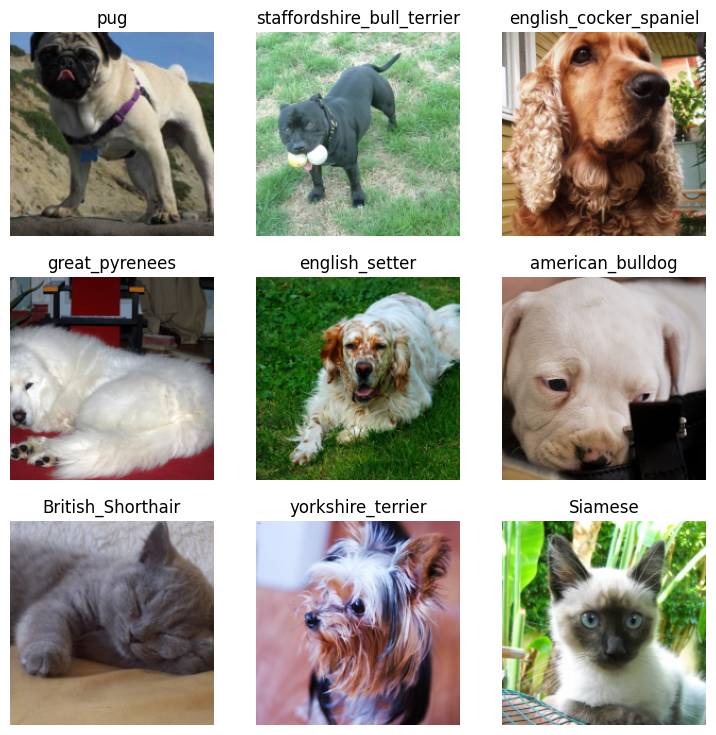

In [6]:
from fastai.vision.all import *
import timm


path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
    item_tfms=Resize(192))

dls.show_batch()


learn = vision_learner(dls,'convnext_tiny_in22k', metrics=error_rate)
learn.fine_tune(3)

In [11]:
learn.export('pet_breed_model.pkl')